In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


#### Exploratory Data Analysis for customers:

- ##### Descriptive EDA

In [2]:
customers = pd.read_csv('../../../data/customers.csv')

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2041 non-null   int64  
 1   id                  2041 non-null   int64  
 2   business            2041 non-null   object 
 3   first_name          2041 non-null   object 
 4   surname             2037 non-null   object 
 5   country_id          2041 non-null   int64  
 6   region_id           2041 non-null   int64  
 7   district_id         2041 non-null   int64  
 8   street              2041 non-null   object 
 9   destination         2041 non-null   object 
 10  place_name          2041 non-null   object 
 11  latitude            2041 non-null   float64
 12  longitude           2041 non-null   float64
 13  distance            2041 non-null   float64
 14  phone               2041 non-null   int64  
 15  password            2041 non-null   object 
 16  email 

##### Compare customers location

In [4]:
customers.columns

Index(['Unnamed: 0', 'id', 'business', 'first_name', 'surname', 'country_id',
       'region_id', 'district_id', 'street', 'destination', 'place_name',
       'latitude', 'longitude', 'distance', 'phone', 'password', 'email',
       'otp', 'fcm_token', 'address', 'revenue', 'tagname', 'profile',
       'has_discount', 'discount_percent', 'status', 'is_active', 'sent_at',
       'sent_count', 'verified_at', 'is_verified', 'is_approved',
       'can_purchase', 'description', 'document', 'is_locked', 'is_deleted',
       'reason', 'unsubscribe_reason', 'is_subscribed', 'version',
       'last_login_ip', 'last_seen_at', 'created_at', 'updated_at'],
      dtype='object')

In [5]:
customers.isna().sum()

Unnamed: 0               0
id                       0
business                 0
first_name               0
surname                  4
country_id               0
region_id                0
district_id              0
street                   0
destination              0
place_name               0
latitude                 0
longitude                0
distance                 0
phone                    0
password                 0
email                    0
otp                      0
fcm_token                0
address                  0
revenue                  0
tagname               1757
profile                  0
has_discount             0
discount_percent         0
status                   0
is_active                0
sent_at                  0
sent_count               0
verified_at            222
is_verified              0
is_approved              0
can_purchase             0
description           2036
document              1820
is_locked                0
is_deleted               0
r

In [6]:
customers.duplicated().sum()

0

In [7]:
#check regiions comparison
customers['region_id'].value_counts()

1    2041
Name: region_id, dtype: int64

In [8]:
#check districts
customers['district_id'].value_counts()

1    2041
Name: district_id, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

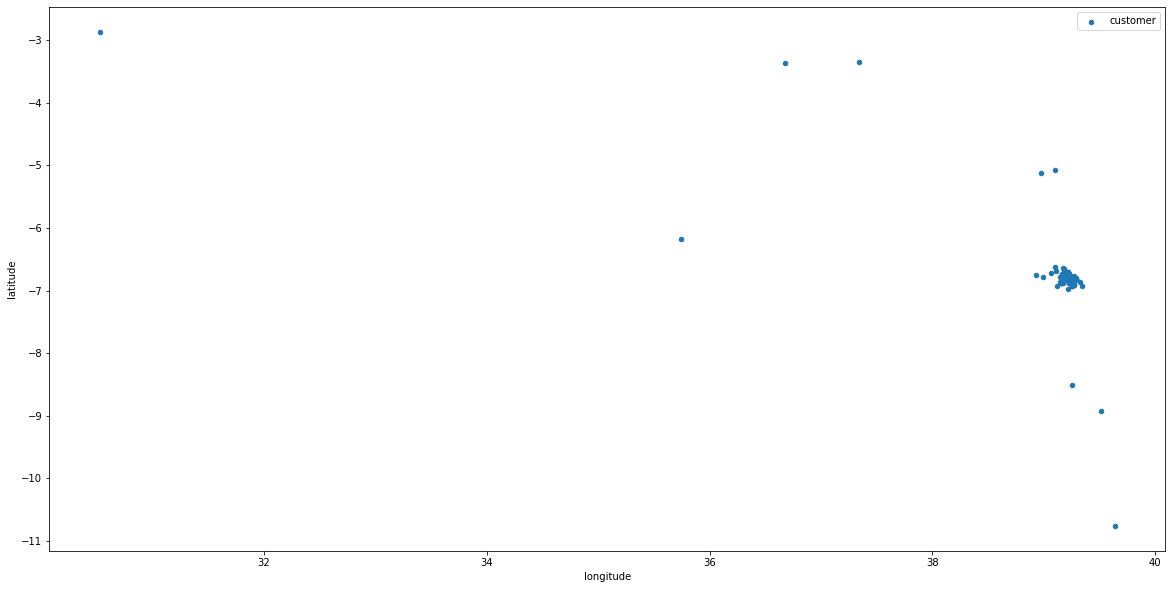

In [9]:
# plot a scatter plot to view data scattering
customers.plot(kind="scatter",x="longitude",y="latitude",figsize=(20,10),label="customer")

In [10]:
customers['distance'].value_counts()

0.1     2039
18.0       1
3.0        1
Name: distance, dtype: int64

<AxesSubplot:xlabel='distance', ylabel='count'>

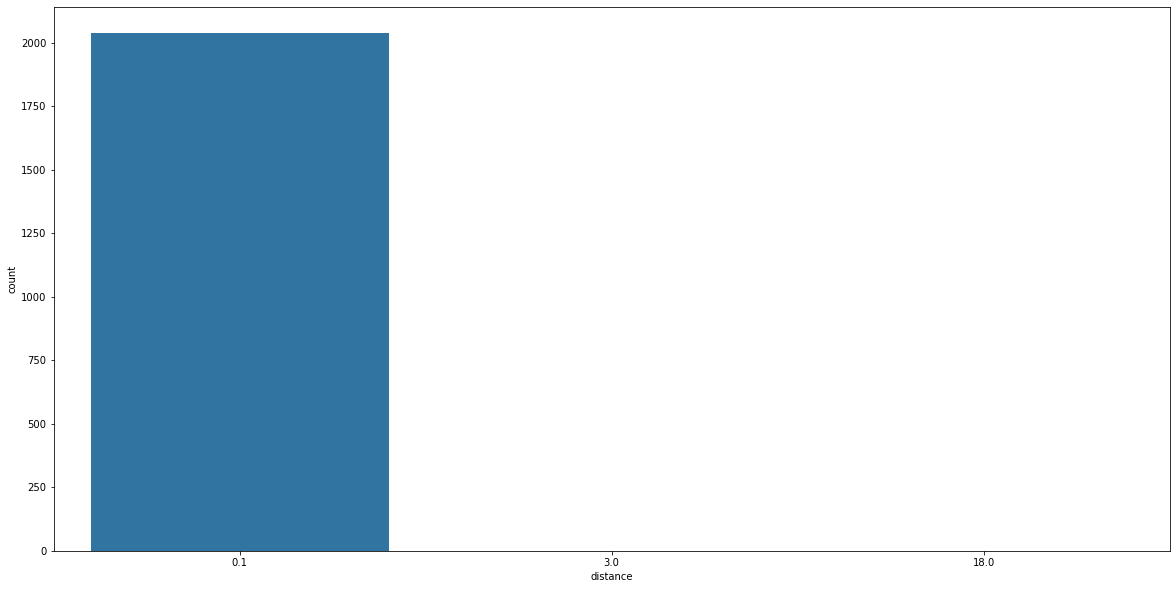

In [11]:
plt.figure(figsize=(20,10))
sb.countplot(data=customers, x='distance')

In [12]:
# check comparison of streets where customers come from
customers['street'].value_counts()

------                                                                           1349
testing                                                                            19
Dar es Salaam Unnamed Road Dar es Salam Tanzania,                                   6
Testing                                                                             4
test                                                                                4
                                                                                 ... 
Kwa Asat                                                                            1
MLIMANI CITY                                                                        1
Dar es Salaam 67J9+5XV Dar es Salam Tanzania,                                       1
Busra pharmacy likwati Street opp. wailes primary school temeke dar es salaam       1
MTONI MDADA DLDM (TEST)                                                             1
Name: street, Length: 639, dtype: int64

In [13]:
# there should be a standard way of representing streets for easy analysis, use NaPA

In [14]:
customers['destination'].value_counts()

------                                                 1812
Dar es Salaam Unnamed Road Dar es Salam Tanzania,         5
testing                                                   3
AYSHA PHARMACY                                            2
tegeta nyuki                                              2
                                                       ... 
platinum pharmacy mikocheni                               1
chalinze, pwani                                           1
NAKI DLDM magomeni kagera njia panda                      1
myombo transporter iko kariakoo jangwani 0658200057       1
MTONI MDADA DLDM (TEST)                                   1
Name: destination, Length: 221, dtype: int64

In [15]:
# From the observation it can be seen destination and streets carry nearly similar information, we can decide which one is important to deal with 

In [16]:
customers['place_name'].value_counts() # what does place name signifies in comparison to street and destination

Dar es salaam Tanzania    2039
Mbezi Beach                  1
DM Pharmacy                  1
Name: place_name, dtype: int64

In [17]:
customers['business'].value_counts() # represents business name, has to be standardized(representationary)

pharmacy              19
Pharmacy              10
test                   8
DLDM                   4
john                   4
                      ..
Oysterbay pharmacy     1
Breezy Pharmacy        1
SHEKIVUNGE             1
bede pharmacy          1
wisser pharmacy        1
Name: business, Length: 1895, dtype: int64

In [18]:
customers['is_subscribed'].value_counts()

1    2025
0      16
Name: is_subscribed, dtype: int64

In [19]:
# can we learn the time at which customers login frequently and choose as the best time to send the offers or discounted products

In [20]:
customers[customers['id']==1242]

,Unnamed: 0,id,business,first_name,surname,country_id,region_id,district_id,street,destination,...,is_locked,is_deleted,reason,unsubscribe_reason,is_subscribed,version,last_login_ip,last_seen_at,created_at,updated_at
1162,1162,1242,Kylie K,,Kylie K,1,1,1,JONA KKOO 0762174910,JONA KKOO 0762174910,...,0,0,NaN,NaN,1,2.0.221121,41.222.181.181,2023-01-20 09:43:50,2022-10-08 14:22:29,2023-01-20 15:52:11


In [22]:
len(customers['country_id'].value_counts())

1

In [23]:
len(customers['place_name'].value_counts())

3